# Explore here

In [1]:
# Importar paquetes
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image
import shutil

2025-06-29 05:40:41.452090: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-29 05:40:41.780204: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-29 05:40:41.915591: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751175642.151358   32657 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751175642.427610   32657 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751175642.950172   32657 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
#Ruta al directorio de las imagenes
image_dir = 'data/raw/train'

In [3]:
cat_dir = os.path.join(image_dir, "cat")
dog_dir = os.path.join(image_dir, "dog")

# Create subfolders if they don't exist
os.makedirs(cat_dir, exist_ok=True)
os.makedirs(dog_dir, exist_ok=True)

for filename in os.listdir(image_dir):
    src_path = os.path.join(image_dir, filename)

    # Skip directories—only move files
    if os.path.isfile(src_path):
        if filename.lower().startswith("cat"):
            shutil.move(src_path, os.path.join(cat_dir, filename))
        elif filename.lower().startswith("dog"):
            shutil.move(src_path, os.path.join(dog_dir, filename))






In [4]:
print("Cat images:", len(os.listdir(cat_dir)))
print("Dog images:", len(os.listdir(dog_dir)))

Cat images: 0
Dog images: 0


In [5]:
dog_subfolder = os.path.join(image_dir, "dog")

In [6]:
dog_subfolder = '/workspaces/image_classification_project/data/raw/train/dog'
dog_image_files = [
    f for f in os.listdir(dog_subfolder)
    if f.lower().endswith(('.jpg', '.jpeg', '.png')) and os.path.isfile(os.path.join(dog_subfolder, f))
]

dog_images = []
num_images = min(9, len(dog_image_files))  # avoid index errors
for i in range(num_images):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path, target_size=(224, 224))  # standard size for many models
    img_array = image.img_to_array(img) / 255.0
    dog_images.append(img_array)

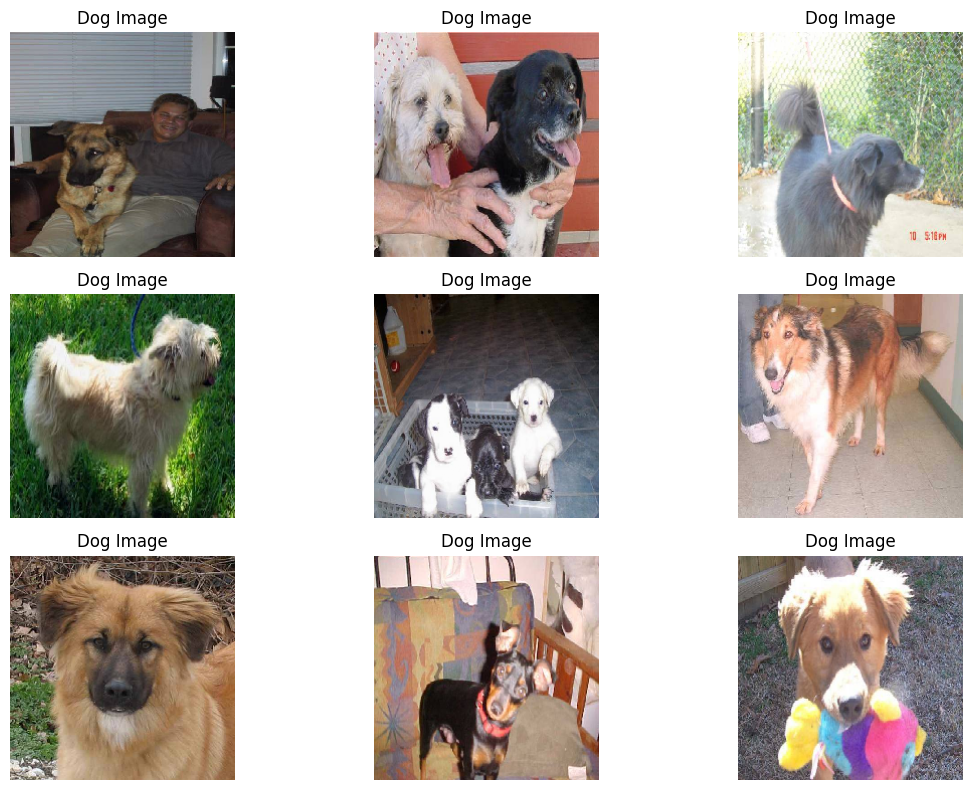

In [7]:
# Cree una única figura para mostrar las nueve imágenes
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Ajustar el diseño
plt.tight_layout()

# Mostrar las imágenes
plt.show()

In [8]:
cat_subfolder = '/workspaces/image_classification_project/data/raw/train/cat'
cat_image_files = [
    f for f in os.listdir(cat_subfolder)
    if f.lower().endswith(('.jpg', '.jpeg', '.png')) and os.path.isfile(os.path.join(cat_subfolder, f))
]

cat_images = []
num_images = min(9, len(cat_image_files))  # avoid index errors
for i in range(num_images):
    img_path = os.path.join(cat_subfolder, cat_image_files[i])
    img = image.load_img(img_path, target_size=(224, 224))  # standard size for many models
    img_array = image.img_to_array(img) / 255.0
    cat_images.append(img_array)

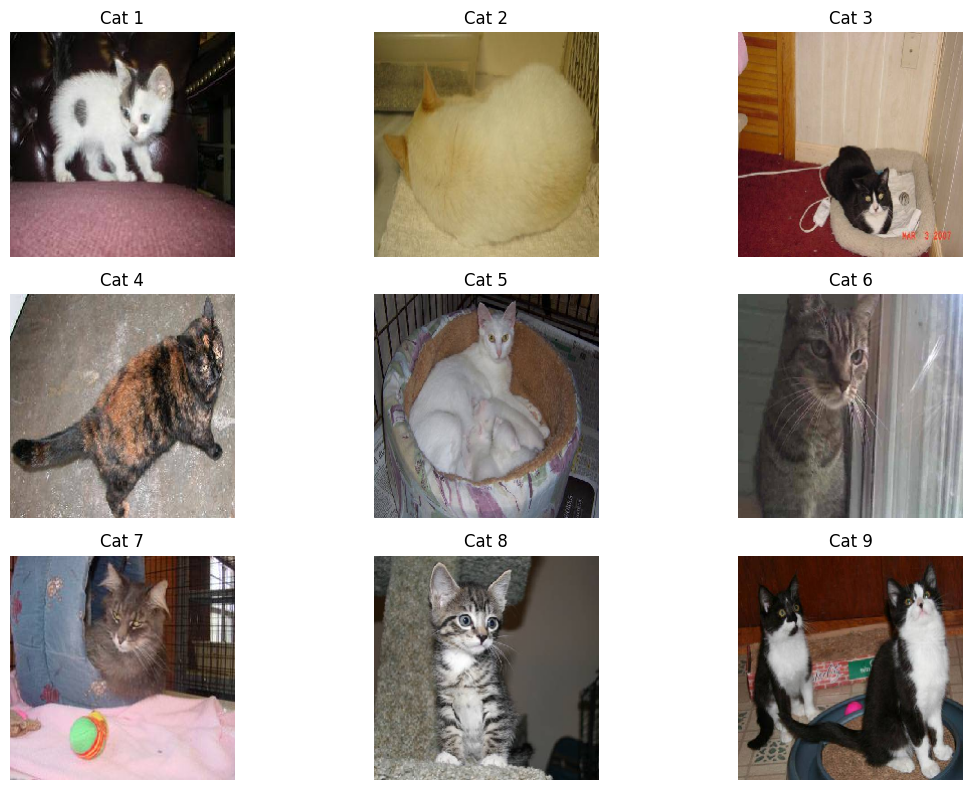

In [9]:
plt.figure(figsize=(12, 8))
for i in range(len(cat_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cat_images[i])
    plt.title(f'Cat {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    '../data/raw/train',
    target_size=(100, 100),
    batch_size=8,
    class_mode='sparse',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    '../data/raw/train',
    target_size=(100, 100),
    batch_size=8,
    class_mode='sparse',
    subset='validation'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [11]:
# Mover los datos a través de la red neuronal
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape=(100, 100, 3), filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Mover los datos por las capas densas

model.add(Flatten())
model.add(Dense(512, activation='relu'))


/home/vscode/.local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-29 05:40:50.428115: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 50, 50, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,074,496 (65.13 MB)

 Trainable params: 17,074,496 (65.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Compilar el modelo con Adam 
from keras.optimizers import Adam

# Compilar el modelo antes del entrenamiento
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    steps_per_epoch=100,          # Solo 100 lotes por época
    validation_steps=20,          # 20 para validación
    callbacks=[],                 # Podemos añadir EarlyStopping luego
    verbose=1
)


Epoch 1/5


/home/vscode/.local/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-06-29 05:40:55.086526: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20480000 exceeds 10% of free system memory.
2025-06-29 05:40:55.173207: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20480000 exceeds 10% of free system memory.
2025-06-29 05:40:56.701859: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23040000 exceeds 10% of free system memory.
2025-06-29 05:40:56.911102: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23040000 exceeds 10% of free system memory.
2025-06-29 05:4

  7/100 ━━━━━━━━━━━━━━━━━━━━ 4:24 3s/step - accuracy: 0.3206 - loss: 8.3409